In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
con = sqlite3.connect('../nokia.db')
df = pd.read_sql_query('SELECT * FROM Makkah_5g', con)
con.close()
display(df.head())

,Id,Phone,Bin Time Stamp,Latitude,Longitude,Nemo Data Connection Attempt - HTTP,Nemo Data Connection Success,Nemo Data Connection Disconnect,Nemo Data Transfer Fail - HTTP,Nemo Data Connection Dropped,...,Data Throughput-Physical DSCH Throughput (kbps),PCell-Strongest Serving PCell Avg DL PRB,5G NR-NR Best SS-RSRP,5G NR-NR PDCP downlink throughput (Mbps),5G NR-NR Best SS-SINR,NR-ARFCN-SCG PS Cell,NR Best Serving PCI for selected set-SCG PS Cell,Common Metrics-Band Info,Common Metrics-Protocol,cluster
0,1,1,06/18/2024 14:43:34.000,21.357107,39.830204,Nemo Data Connection Attempt - HTTP- 1,Nemo Data Connection Success- 1,0,0,0,...,1.39,2.67,NaN,NaN,NaN,NaN,NaN,LTE IMT 2100 - Band 1,LTE,37.0
1,2,1,06/18/2024 14:43:36.000,21.357109,39.830204,Nemo Data Connection Attempt - HTTP- 1,Nemo Data Connection Success- 1,0,0,0,...,13552.24,17.25,-78.50,65.045551,19.45,643296.0,820.0,LTE IMT 2100 - Band 1,EN-DC,37.0
2,3,1,06/18/2024 14:43:38.000,21.357109,39.830204,Nemo Data Connection Attempt - HTTP- 1,Nemo Data Connection Success- 1,0,0,0,...,71423.05,19.75,-79.80,316.771094,16.38,643296.0,820.0,LTE IMT 2100 - Band 1,EN-DC,37.0
3,4,1,06/18/2024 14:43:40.000,21.357109,39.830204,Nemo Data Connection Attempt - HTTP- 1,Nemo Data Connection Success- 1,0,0,0,...,67825.94,22.25,-80.05,355.659812,17.10,643296.0,820.0,LTE IMT 2100 - Band 1,EN-DC,37.0
4,5,1,06/18/2024 14:43:42.000,21.357109,39.830204,Nemo Data Connection Attempt - HTTP- 1,0,0,0,0,...,62527.23,26.00,-79.95,354.720813,20.08,643296.0,820.0,LTE IMT 2100 - Band 1,EN-DC,37.0


In [6]:
#visualize columns
print(df.columns)

Index(['Id', 'Phone', 'Bin Time Stamp', 'Latitude', 'Longitude',
       'Nemo Data Connection Attempt - HTTP', 'Nemo Data Connection Success',
       'Nemo Data Connection Disconnect', 'Nemo Data Transfer Fail - HTTP',
       'Nemo Data Connection Dropped',
       'Data Throughput-RLC DL Throughput (kbps)',
       'Serving Channel Info-DL EARFCN', 'Serving Cell Info-Serving PCI',
       'RSRP (d Bm)-Dominant RSRP (d Bm) ', 'Common-Protocol',
       'Serving RS Info-NR Best SS-RSRP', 'Serving RS Info-NR Best SS-SINR',
       'Data Throughput-NR PDCP downlink throughput (Mbps)',
       'NR Best Serving PCI for selected set-199', 'NR-ARFCN-199',
       'NR PDSCH MCS index for CW0-199', 'NR PDSCH modulation for CW0-199',
       'GSM Cell Identity-GSM Serving Cell Id',
       'Serving RS Info-Serving RSRP (d Bm)',
       'Serving RS Info-Serving RS CINR (d B)',
       'Serving RS Info-Serving RSRQ (d B)',
       'Audio Quality.POLQA Downlink MOS-POLQA SWB',
       'Data Throughput-Physical 

In [5]:
# Check for missing values
print(df.isnull().sum())

Id                                                        0
Phone                                                     0
Bin Time Stamp                                            0
Latitude                                                  0
Longitude                                                 0
Nemo Data Connection Attempt - HTTP                       0
Nemo Data Connection Success                              0
Nemo Data Connection Disconnect                           0
Nemo Data Transfer Fail - HTTP                            0
Nemo Data Connection Dropped                              0
Data Throughput-RLC DL Throughput (kbps)                 47
Serving Channel Info-DL EARFCN                           23
Serving Cell Info-Serving PCI                            23
RSRP (d Bm)-Dominant RSRP (d Bm)                         25
Common-Protocol                                           0
Serving RS Info-NR Best SS-RSRP                         715
Serving RS Info-NR Best SS-SINR         

In [13]:
# Get basic statistics
print(df.describe(include='all'))
print(df.info())

                  Id    Phone           Bin Time Stamp      Latitude  \
count   20274.000000  20274.0                    20274  20274.000000   
unique           NaN      NaN                    20274           NaN   
top              NaN      NaN  06/18/2024 14:43:34.000           NaN   
freq             NaN      NaN                        1           NaN   
mean    10137.500000      1.0                      NaN     21.437088   
std      5852.744015      0.0                      NaN      0.053308   
min         1.000000      1.0                      NaN     21.326482   
25%      5069.250000      1.0                      NaN     21.397290   
50%     10137.500000      1.0                      NaN     21.438595   
75%     15205.750000      1.0                      NaN     21.468704   
max     20274.000000      1.0                      NaN     21.601663   

           Longitude Nemo Data Connection Attempt - HTTP  \
count   20274.000000                               20274   
unique         

Network performance Kpis:

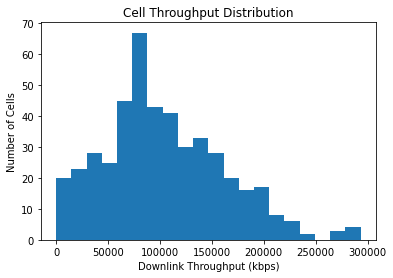

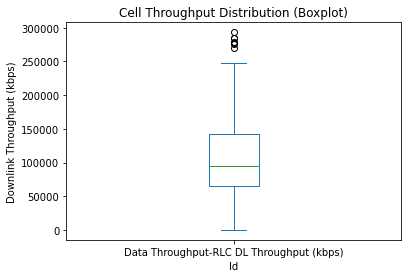

In [18]:
# Group data by cell ID and calculate average throughput
cell_throughput = df.groupby('Serving Cell Info-Serving PCI')['Data Throughput-RLC DL Throughput (kbps)'].mean()
# Histogram
cell_throughput.plot.hist(bins=20)  # Adjust the number of bins as needed
plt.xlabel('Downlink Throughput (kbps)')
plt.ylabel('Number of Cells')
plt.title('Cell Throughput Distribution')
plt.show()

# Boxplot
cell_throughput.plot(kind='box')
plt.xlabel('Id')
plt.ylabel('Downlink Throughput (kbps)')
plt.title('Cell Throughput Distribution (Boxplot)')
plt.show()


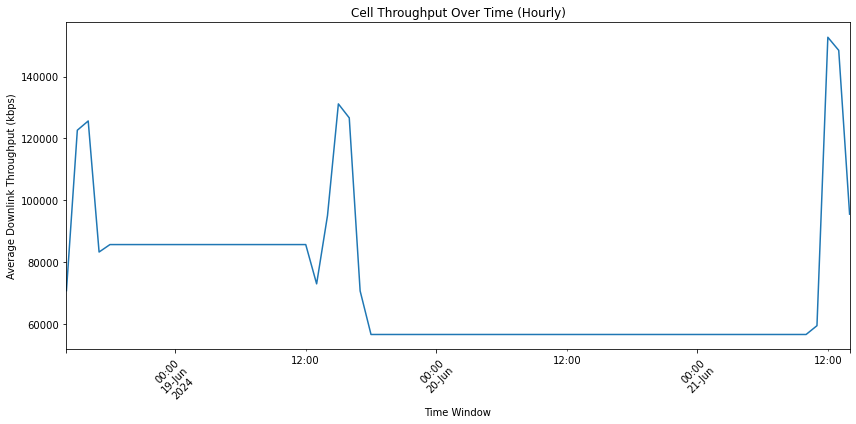

In [15]:
df["Time Window"] = pd.to_datetime(df["Bin Time Stamp"])

# Resample data by hour and calculate average throughput
hourly_throughput = df.resample("H", on="Time Window")["Data Throughput-RLC DL Throughput (kbps)"].mean()

# Handle potential missing data for specific hours
# (Optional, comment out if you don't expect missing data)
hourly_throughput = hourly_throughput.fillna(method='ffill')  # Forward fill missing values

# Plot the hourly throughput
plt.figure(figsize=(12, 6))  
hourly_throughput.plot(kind="line", style='-')
plt.xlabel("Time Window")
plt.ylabel("Average Downlink Throughput (kbps)")
plt.title("Cell Throughput Over Time (Hourly)")

# Ensure all hours are displayed on the x-axis
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Signal strength distribution:

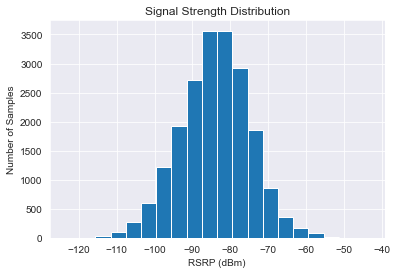

In [8]:
df["Serving RS Info-Serving RSRP (d Bm)"].plot.hist(bins=20)
plt.xlabel("RSRP (dBm)")
plt.ylabel("Number of Samples")
plt.title("Signal Strength Distribution")
plt.show()

Call quality kpis:

In [17]:
df["POLQA Downlink MOS-POLQA SWB"].plot.hist(bins=5)  # Adjust the number of bins as needed
plt.xlabel("RSRQ Score")
plt.ylabel("Number of Calls")
plt.title("Call Quality Distribution (POLQA)")
plt.show()


KeyError: 'POLQA Downlink MOS-POLQA SWB'

Network Utilization KPIs:

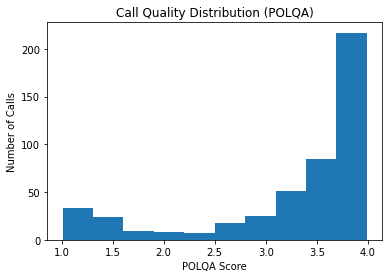

In [10]:
ndf = df[df["POLQA Downlink MOS-POLQA SWB"] < 4]["POLQA Downlink MOS-POLQA SWB"].plot.hist()
plt.xlabel("POLQA Score")
plt.ylabel("Number of Calls")
plt.title("Call Quality Distribution (POLQA)")
plt.show()


Corr matrix

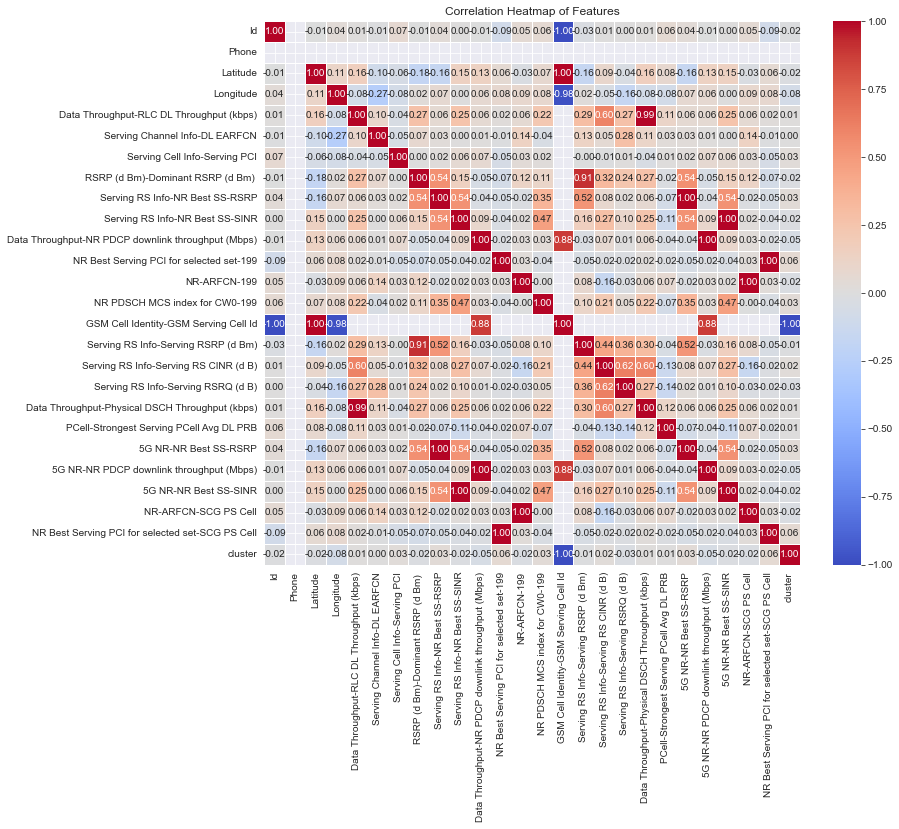

In [5]:
df = df.select_dtypes(include=[np.number])
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    vmin=-1,
    vmax=1
)

# Set the title
plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()


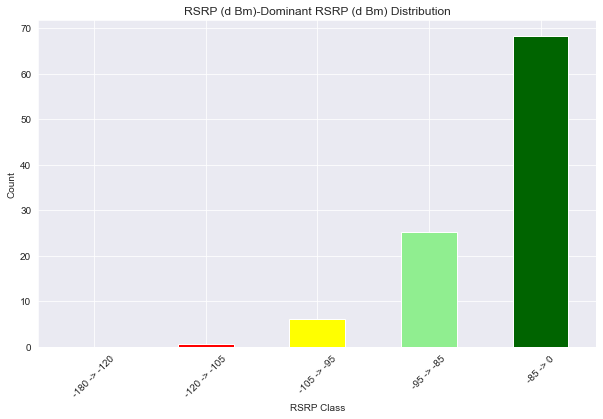

In [31]:
bins = [-180, -120, -105, -95, -85, 0]
labels = ['-180 -> -120', '-120 -> -105', '-105 -> -95', '-95 -> -85', '-85 -> 0']

df['RSRP Class'] = pd.cut(df['RSRP (d Bm)-Dominant RSRP (d Bm) '], bins=bins, labels=labels)

class_counts = df['RSRP Class'].value_counts(sort=False)/len(df) * 100

colors = ['black', 'red', 'yellow', 'lightgreen', 'darkgreen']

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color=colors)
plt.title('RSRP (d Bm)-Dominant RSRP (d Bm) Distribution')
plt.xlabel('RSRP Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define the bins and labels
bins = [-180, -120, -105, -95, -85, 0]
labels = ['-180 -> -120', '-120 -> -105', '-105 -> -95', '-95 -> -85', '-85 -> 0']
colors = ['black', 'red', 'yellow', 'lightgreen', 'darkgreen']

# Categorize the data into the bins
df['RSRP Class'] = pd.cut(df['RSRP (d Bm)-Dominant RSRP (d Bm) '], bins=bins, labels=labels)

# Map color to each class
df['Color'] = df['RSRP Class'].map(dict(zip(labels, colors)))

# Create the map using Plotly Express
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    color="RSRP Class",
    color_discrete_map=dict(zip(labels, colors)),
    size_max=15,
    zoom=13,
    mapbox_style="carto-positron",
    hover_data={"RSRP (d Bm)-Dominant RSRP (d Bm) ": True, "Latitude": False, "Longitude": False}
)

# Update the layout to include a custom legend
fig.update_layout(
    legend=dict(
        title="RSRP Class",
        orientation="v",
        yanchor="bottom",
        y=0.25,
        xanchor="right",
        x=1.05,
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Show the figure in the notebook
fig.show()


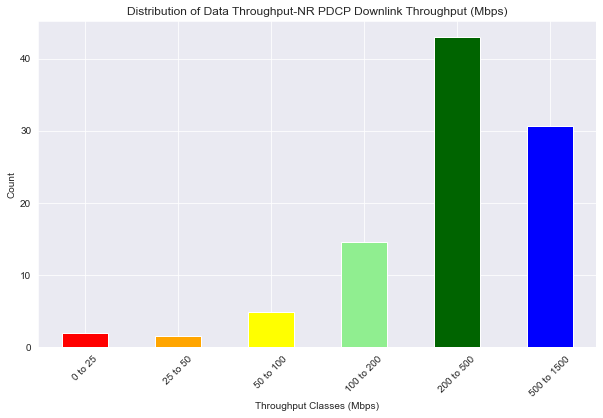

In [34]:
bins = [0, 25, 50, 100, 200, 500, 1500]
labels = ['0 to 25', '25 to 50', '50 to 100', '100 to 200', '200 to 500', '500 to 1500']
colors = ['red', 'orange', 'yellow', 'lightgreen', 'darkgreen', 'blue']

# Categorize the data into the bins
df['Throughput Class'] = pd.cut(df['Data Throughput-NR PDCP downlink throughput (Mbps)'], bins=bins, labels=labels, right=False)

# Plot the bar chart
bar_counts = df['Throughput Class'].value_counts().reindex(labels)/ len(df) * 100

plt.figure(figsize=(10, 6))
bar_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Data Throughput-NR PDCP Downlink Throughput (Mbps)')
plt.xlabel('Throughput Classes (Mbps)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['Color'] = df['Throughput Class'].map(dict(zip(labels, colors)))

# Create the map using Plotly Express
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    color="Throughput Class",
    color_discrete_map=dict(zip(labels, colors)),
    size_max=15,
    zoom=13,
    mapbox_style="carto-positron",
    hover_data={"Data Throughput-NR PDCP downlink throughput (Mbps)": True, "Latitude": False, "Longitude": False}
)

# Update the layout to include a custom legend
fig.update_layout(
    legend=dict(
        title="Throughput Class",
        orientation="v",
        yanchor="bottom",
        y=0.25,
        xanchor="right",
        x=1.05,
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Show the figure in the notebook
fig.show()

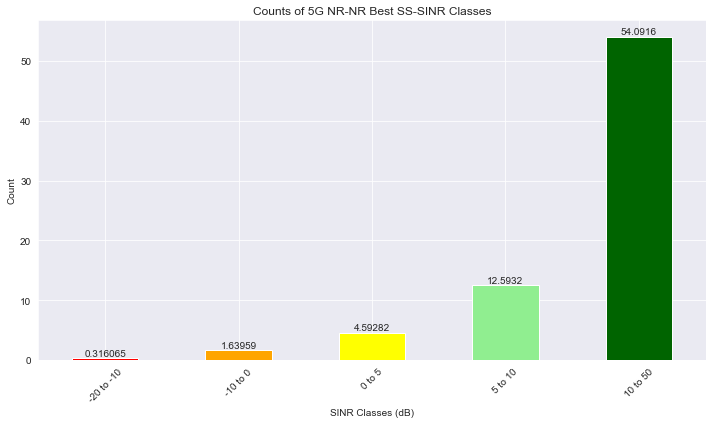

In [39]:

# Define the bins and labels
bins = [-20, -10, 0, 5, 10,50]
labels = ['-20 to -10', '-10 to 0', '0 to 5', '5 to 10', '10 to 50']

# Categorize the data
df['SINR Category'] = pd.cut(df['5G NR-NR Best SS-SINR'], bins=bins, labels=labels)
# Count the number of occurrences in each category
sinr_counts = df['SINR Category'].value_counts().reindex(labels, fill_value=0) / len(df) * 100
# Define colors for each class
colors = {
    '10 to 50': 'darkgreen',
    '5 to 10': 'lightgreen',
    '0 to 5': 'yellow',
    '-10 to 0': 'orange',
    '-20 to -10': 'red'
}

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_plot = sinr_counts.plot(kind='bar', color=[colors[key] for key in sinr_counts.index])

# Add the exact numbers on top of the bars
for i in bar_plot.containers:
    bar_plot.bar_label(i, label_type='edge')

plt.title('Counts of 5G NR-NR Best SS-SINR Classes')
plt.xlabel('SINR Classes (dB)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

# Plot the map
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    color="SINR Category",
    color_discrete_map=colors,
    size_max=15,
    zoom=13,
    mapbox_style="carto-positron",
    hover_data={"5G NR-NR Best SS-SINR": True, "Latitude": False, "Longitude": False}
)

# Update the layout to include a custom legend
fig.update_layout(
    legend=dict(
        title="SINR Category",
        orientation="v",
        yanchor="bottom",
        y=0.25,
        xanchor="right",
        x=1.05,
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Show the figure
fig.show()